In [1]:
import pandas as pd

temp_list = []

with open("train_call.txt", 'r') as temp:
    for line in temp:
        temp_list.append(line.split())

columns_temp = temp_list[0]
columns_temp = [x.replace("\"", "") for x in columns_temp]

df_train = pd.DataFrame(temp_list[1:], columns=columns_temp)
X = df_train.drop(['Chromosome', 'Start','End', 'Nclone'], axis=1)
X = X.transpose()

labels = []

# X for features Y for breast cancer subtype where 1 = HER2+, 2 = HR+, 3 = Triple Neg
with open("Train_clinical.txt", 'r') as temp_labels:
    next(temp_labels)
    for line in temp_labels:
        temp = line.strip()
        temp = temp.split()
        if temp[1].strip("\"") == "HER2+":
            labels.append(1)
        if temp[1].strip("\"") == "HR+":
            labels.append(2)
        if temp[1].strip("\"") == "Triple":
            labels.append(3)

Y = labels
            
important_genes = []

with open("important_genes_2.csv", 'r') as imp_genes:
    for line in imp_genes:
        temp = line.strip()
        important_genes.append(temp.split(","))
        
imp_genes = []

for gene in important_genes[1:]:
    imp_genes.append([gene[0], gene[1], gene[2], gene[3]])
    
important_genes = []

for x in imp_genes:
    for i, y in enumerate(df_train.values.tolist()):
        if x[1] == y[0] and x[2] == y[1] and x[3] == y[2]:
            important_genes.append(i)
            
print(X)
print(Y)
print("The regions found in the literature were: ", important_genes)

          0    1    2    3    4    5    6    7    8    9     ... 2824 2825  \
Array.129    0    0    0    0    0    0    0    0    0    0  ...    2    2   
Array.34     0    0    0    0    0    0    0    0    0    0  ...    1    1   
Array.67     0    0    0    0    0    0    0    0    0    0  ...    1    1   
Array.24     0    0    0    0    0    0    0   -1    0    0  ...    0    0   
Array.22     0    0    0    0    0    0    0    0    0    0  ...    1    1   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Array.10     0    0    0    0    0    0    0    0    0    0  ...    1    1   
Array.123    0    0    0    0    0    0    0    0    0    0  ...    1    1   
Array.100    0    0    0    0    0    0    0    0    0    0  ...    1    1   
Array.134   -1   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...    1    1   
Array.130    0    0    0    0    0    0    0    0    0    0  ...    1    1   

          2826 2827 2828 2829 2830 2831 2832 2833  
Array.129  

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt

# #Loading data
patients = X.values.tolist()

## FEATURE SELECTION

# we need to shift the features by 1 since the chi2 function does not take non-negative values
patients_shift = []

for patient in patients:
    x = []
    for feature in patient:
        x.append(int(feature) + 1)
    patients_shift.append(x)

chi, p_val = chi2(patients_shift, Y)

imp_genes_p_values = []

for i, j in enumerate(important_genes):
    if p_val[j] >= 0.05:
        imp_genes_p_values.append([imp_genes[i][0], j, p_val[j], "No"])
    else:
        imp_genes_p_values.append([imp_genes[i][0], j, p_val[j], "Yes"])
    

important_genes_scores = pd.DataFrame(imp_genes_p_values, columns=["Gene", "Region number", "P-value", "Yes/No"])
pd.set_option('display.max_rows', 75)
print(important_genes_scores)

X_feature_selected = X

threshold = 0.05
for i, val in enumerate(p_val):
    # this drops the p_values higher than 0.05 that are not in the significant genes list
    if val >= threshold and i not in important_genes:
        X_feature_selected = X_feature_selected.drop([i], axis=1)

                 Gene  Region number       P-value Yes/No
0              DIRAS3            111  6.897062e-01     No
1              PTPN22            157  7.287985e-01     No
2                 AGT            249  9.791761e-01     No
3               CLSPN             65  5.039604e-01     No
4   BARD1/CASP8/CTLA4            361  8.022867e-01     No
5               SF3B1            360  8.717109e-01     No
6              PIK3CA            479  4.007464e-01     No
7               NFKB1            576  8.076397e-01     No
8                FGF2            583  8.076397e-01     No
9               RAD50            688  1.138701e-01     No
10             MAP3K1            664  1.569463e-01     No
11               TERT            625  9.757757e-01     No
12             PIK3R1            670  4.250528e-02    Yes
13              CCND3            772  1.568220e-01     No
14               ESR1            876  4.297669e-01     No
15               ESR1            877  3.435048e-01     No
16            

In [3]:
X = X_feature_selected
number_of_features = len(X.values.tolist()[0])
print("Number of features = {}".format(number_of_features))

Number of features = 204


In [33]:
print(X.iloc[:,170])

Array.129     2
Array.34      0
Array.67     -1
Array.24      0
Array.22      0
             ..
Array.10      2
Array.123     0
Array.100     0
Array.134     1
Array.130     2
Name: 2184, Length: 100, dtype: object


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

def classification_report_with_accuracy_score(y_true, y_pred):
    "Scorer for the cross validation function"
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) 

def evaluate_model(model, features, labels):
    "Gets the cross validation score using a 5-fold (cv=5) cross validation"
    scores = cross_val_score(model, features, labels, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
    
    return scores

In [5]:
def nested_cross_validation(MODEL, PARAMS, X, Y, NUM_TRIALS):
    model_scores = np.zeros(NUM_TRIALS)
    model_params = {}
    nested_scores = []
    
    for i in range(NUM_TRIALS):
        print("Running Trial {}...".format(i + 1))
        inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=i)
        outer_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=i)
        
        model = GridSearchCV(estimator=MODEL, param_grid=PARAMS, cv=inner_cv, n_jobs=2)
        model.fit(X, Y)
        print(model.score(X, Y), model.best_params_)
        model_scores[i] = model.score(X, Y)
        model_params[i] = model.best_params_
        
        nested_score = cross_val_score(model, X=X, y=Y, cv=outer_cv)
        nested_scores.append([nested_score.mean(), nested_score.std()])
        print(nested_score.mean(), nested_score.std())
        
    return model_scores, model_params, nested_scores

In [6]:
parameters = {'solver': ['lbfgs'], 
              'max_iter': [500, 1000, 1500, 2000], 
              'hidden_layer_sizes':np.linspace(20, number_of_features, 4, dtype=int)
             }

mlp = MLPClassifier()

mlp_scores, mlp_params, mlp_nested = nested_cross_validation(mlp, parameters, X, Y, 100)

Running Trial 1...
1.0 {'hidden_layer_sizes': 20, 'max_iter': 500, 'solver': 'lbfgs'}
0.8300000000000001 0.11090536506409417
Running Trial 2...
1.0 {'hidden_layer_sizes': 142, 'max_iter': 1500, 'solver': 'lbfgs'}
0.87 0.033166247903554026
Running Trial 3...
1.0 {'hidden_layer_sizes': 142, 'max_iter': 1500, 'solver': 'lbfgs'}
0.88 0.040000000000000036
Running Trial 4...
1.0 {'hidden_layer_sizes': 20, 'max_iter': 1000, 'solver': 'lbfgs'}
0.8 0.028284271247461888
Running Trial 5...
1.0 {'hidden_layer_sizes': 81, 'max_iter': 1000, 'solver': 'lbfgs'}
0.8699999999999999 0.05916079783099614
Running Trial 6...
1.0 {'hidden_layer_sizes': 204, 'max_iter': 1500, 'solver': 'lbfgs'}
0.8500000000000001 0.07141428428542851
Running Trial 7...
1.0 {'hidden_layer_sizes': 142, 'max_iter': 500, 'solver': 'lbfgs'}
0.83 0.11090536506409417
Running Trial 8...
1.0 {'hidden_layer_sizes': 142, 'max_iter': 1500, 'solver': 'lbfgs'}
0.8700000000000001 0.04358898943540673
Running Trial 9...
1.0 {'hidden_layer_sizes

1.0 {'hidden_layer_sizes': 81, 'max_iter': 2000, 'solver': 'lbfgs'}
0.86 0.03464101615137758
Running Trial 71...
1.0 {'hidden_layer_sizes': 81, 'max_iter': 1500, 'solver': 'lbfgs'}
0.87 0.033166247903554026
Running Trial 72...
1.0 {'hidden_layer_sizes': 204, 'max_iter': 1000, 'solver': 'lbfgs'}
0.8500000000000001 0.051961524227066305
Running Trial 73...
1.0 {'hidden_layer_sizes': 20, 'max_iter': 2000, 'solver': 'lbfgs'}
0.87 0.04358898943540673
Running Trial 74...
1.0 {'hidden_layer_sizes': 204, 'max_iter': 1000, 'solver': 'lbfgs'}
0.87 0.04358898943540673
Running Trial 75...
1.0 {'hidden_layer_sizes': 20, 'max_iter': 500, 'solver': 'lbfgs'}
0.8600000000000001 0.034641016151377525
Running Trial 76...
1.0 {'hidden_layer_sizes': 20, 'max_iter': 1500, 'solver': 'lbfgs'}
0.8699999999999999 0.05916079783099614
Running Trial 77...
1.0 {'hidden_layer_sizes': 142, 'max_iter': 500, 'solver': 'lbfgs'}
0.8300000000000001 0.04358898943540673
Running Trial 78...
1.0 {'hidden_layer_sizes': 20, 'max_

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 5, dtype=int)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Create the random grid
parameters = {'n_estimators': n_estimators,
               'max_features': max_features}

rf = RandomForestClassifier()

rf_scores, rf_params, rf_nested = nested_cross_validation(rf, parameters, X, Y, 100)

Running Trial 1...
1.0 {'max_features': 'auto', 'n_estimators': 387}
0.76 0.028284271247461926
Running Trial 2...
1.0 {'max_features': 'sqrt', 'n_estimators': 162}
0.8200000000000001 0.06
Running Trial 3...
1.0 {'max_features': 'sqrt', 'n_estimators': 275}
0.8300000000000001 0.05196152422706631
Running Trial 4...
1.0 {'max_features': 'sqrt', 'n_estimators': 275}
0.7500000000000001 0.0714142842854285
Running Trial 5...
1.0 {'max_features': 'auto', 'n_estimators': 162}
0.76 0.08485281374238571
Running Trial 6...
1.0 {'max_features': 'sqrt', 'n_estimators': 162}
0.81 0.06557438524302002
Running Trial 7...
1.0 {'max_features': 'sqrt', 'n_estimators': 275}
0.7999999999999999 0.09380831519646858
Running Trial 8...
0.99 {'max_features': 'auto', 'n_estimators': 50}
0.82 0.09999999999999996
Running Trial 9...
1.0 {'max_features': 'auto', 'n_estimators': 162}
0.76 0.040000000000000036
Running Trial 10...
1.0 {'max_features': 'auto', 'n_estimators': 275}
0.81 0.11445523142259596
Running Trial 11.

1.0 {'max_features': 'sqrt', 'n_estimators': 275}
0.79 0.10344080432788601
Running Trial 86...
1.0 {'max_features': 'sqrt', 'n_estimators': 275}
0.79 0.07141428428542848
Running Trial 87...
1.0 {'max_features': 'auto', 'n_estimators': 275}
0.79 0.05196152422706631
Running Trial 88...
1.0 {'max_features': 'auto', 'n_estimators': 162}
0.76 0.04898979485566356
Running Trial 89...
1.0 {'max_features': 'auto', 'n_estimators': 275}
0.78 0.044721359549995794
Running Trial 90...
1.0 {'max_features': 'auto', 'n_estimators': 162}
0.82 0.10770329614269007
Running Trial 91...
1.0 {'max_features': 'sqrt', 'n_estimators': 50}
0.77 0.11445523142259599
Running Trial 92...
1.0 {'max_features': 'auto', 'n_estimators': 500}
0.81 0.051961524227066305
Running Trial 93...
1.0 {'max_features': 'auto', 'n_estimators': 50}
0.76 0.07999999999999996
Running Trial 94...
1.0 {'max_features': 'auto', 'n_estimators': 275}
0.73 0.11090536506409417
Running Trial 95...
1.0 {'max_features': 'sqrt', 'n_estimators': 275}


In [12]:
params = {
          "var_smoothing" : [1e-5, 1e-9]
}
nb = GaussianNB()

nb_scores, nb_params, nb_nested = nested_cross_validation(nb, params, X, Y, 100)

Running Trial 1...
0.89 {'var_smoothing': 1e-05}
0.81 0.0768114574786861
Running Trial 2...
0.89 {'var_smoothing': 1e-09}
0.8099999999999999 0.1072380529476361
Running Trial 3...
0.89 {'var_smoothing': 1e-09}
0.8 0.0692820323027551
Running Trial 4...
0.89 {'var_smoothing': 1e-05}
0.8 0.04898979485566356
Running Trial 5...
0.89 {'var_smoothing': 1e-09}
0.77 0.11445523142259599
Running Trial 6...
0.89 {'var_smoothing': 1e-05}
0.79 0.04358898943540674
Running Trial 7...
0.89 {'var_smoothing': 1e-05}
0.78 0.08717797887081347
Running Trial 8...
0.89 {'var_smoothing': 1e-05}
0.83 0.12449899597988731
Running Trial 9...
0.89 {'var_smoothing': 1e-05}
0.78 0.034641016151377525
Running Trial 10...
0.89 {'var_smoothing': 1e-05}
0.78 0.1
Running Trial 11...
0.89 {'var_smoothing': 1e-09}
0.81 0.11090536506409417
Running Trial 12...
0.89 {'var_smoothing': 1e-09}
0.8199999999999998 0.10392304845413264
Running Trial 13...
0.89 {'var_smoothing': 1e-09}
0.8300000000000001 0.08660254037844384
Running Tria

In [47]:
result_list = []
result_columns = ["Model", "Trial", "Parameters", "Accuracy", "Std_dev"]


for i in range(100):
    result_list.append(["NB", i, nb_params[i], nb_nested[i][0], nb_nested[i][1]])
    
nb_df = pd.DataFrame(result_list,columns=result_columns)

nb_df.to_csv("NB_results")

In [44]:
result_list = []
result_columns = ["Model", "Trial", "Parameters", "Accuracy", "Std_dev"]


for i in range(100):
    result_list.append(["MLP", i, mlp_params[i], mlp_nested[i][0], mlp_nested[i][1]])
    
mlp_df = pd.DataFrame(result_list,columns=result_columns)

mlp_df.to_csv("MLP_results")

In [45]:
result_list = []
result_columns = ["Model", "Trial", "Parameters", "Accuracy", "Std_dev"]


for i in range(100):
    result_list.append(["RF", i, rf_params[i], rf_nested[i][0], rf_nested[i][1]])
    
rf_df = pd.DataFrame(result_list,columns=result_columns)

rf_df.to_csv("RF_results")

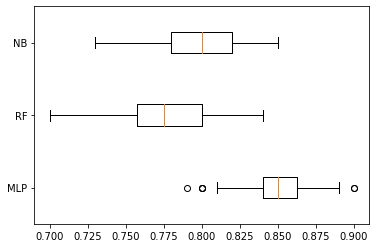

In [14]:
temp1 = np.array(mlp_nested)[:,0] 
temp2 = np.array(rf_nested)[:,0]
temp3 = np.array(nb_nested)[:,0]

# print(temp1)

plt.boxplot([temp1, temp2, temp3], vert=0, labels=['MLP', 'RF', "NB"])
plt.savefig("boxplot.png", dpi=300)
plt.show()

Feature ranking:
1. feature 170 (0.113050)
2. feature 201 (0.016140)
3. feature 181 (0.015683)
4. feature 26 (0.014354)
5. feature 55 (0.014103)
6. feature 3 (0.013284)
7. feature 187 (0.013182)
8. feature 17 (0.013129)
9. feature 198 (0.013081)
10. feature 123 (0.013056)
11. feature 185 (0.012242)
12. feature 188 (0.011577)
13. feature 113 (0.011234)
14. feature 41 (0.010344)
15. feature 179 (0.010288)
16. feature 122 (0.010015)
17. feature 121 (0.009961)
18. feature 136 (0.009958)
19. feature 29 (0.009850)
20. feature 18 (0.009226)
21. feature 4 (0.009071)
22. feature 186 (0.008986)
23. feature 129 (0.008790)
24. feature 199 (0.008763)
25. feature 31 (0.008748)
26. feature 54 (0.008368)
27. feature 115 (0.007871)
28. feature 174 (0.007802)
29. feature 197 (0.007720)
30. feature 140 (0.007683)
31. feature 19 (0.007662)
32. feature 138 (0.007483)
33. feature 114 (0.007390)
34. feature 200 (0.007148)
35. feature 139 (0.007107)
36. feature 33 (0.006964)
37. feature 47 (0.006854)
38. feat

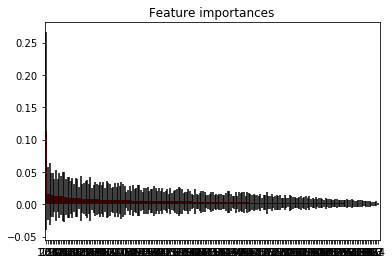

NameError: name 'pr' is not defined

In [28]:
# Random Forest

originalclass = []
predictedclass = []

forest = RandomForestClassifier(n_estimators=100)
# temp = evaluate_model(random_forest, X, Y)

forest.fit(X, Y)
# print(random_forest.feature_importances_.max())
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
print(classification_report(originalclass, pr/edictedclass)) 

In [37]:
# Naive Bayes

originalclass = []
predictedclass = []

gnb = GaussianNB()
gnb.fit(X, Y)
print(gnb.coefs_)

# temp = evaluate_model(gnb, X, Y)
# print(classification_report(originalclass, predictedclass))

AttributeError: 'GaussianNB' object has no attribute 'coefs_'

In [34]:
# Neural network with 1 hidden layer (the hidden layer is as big as the number of features)

originalclass = []
predictedclass = []

mlp = MLPClassifier(solver='lbfgs', activation="relu", alpha=0.0001,
                    hidden_layer_sizes=(142,), max_iter=1000)

temp = evaluate_model(mlp, X, Y)
print(classification_report(originalclass, predictedclass))

AttributeError: 'MLPClassifier' object has no attribute 'feature_importances_'

In [ ]:
# Neural network with 2 hidden layer (the hidden layer is as big as the number of features)

originalclass = []
predictedclass = []

mlp = MLPClassifier(solver='lbfgs', activation="relu", alpha=1e-5,
                    hidden_layer_sizes=(number_of_features, number_of_features), max_iter=1000)

temp = evaluate_model(mlp, X, Y)
print(classification_report(originalclass, predictedclass))

In [ ]:
# Neural network with 3 hidden layer (the hidden layer is as big as the number of features)

originalclass = []
predictedclass = []

mlp = MLPClassifier(solver='lbfgs', activation="relu", alpha=1e-5,
                    hidden_layer_sizes=(number_of_features, number_of_features, number_of_features,), max_iter=1000)

temp = evaluate_model(mlp, X, Y)
print(classification_report(originalclass, predictedclass))